In [ ]:
#Simple Image classification using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)


In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

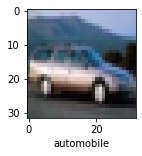

In [25]:
plot_sample(X_train, y_train, 4)

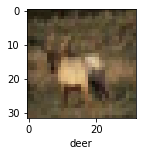

In [10]:
plot_sample(X_train, y_train, 3)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.7285 - accuracy: 0.3660
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1660 - accuracy: 0.5893
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0104 - accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9204 - accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8612 - accuracy: 0.7004
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7967 - accuracy: 0.7217
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7628 - accuracy: 0.7324
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7024 - accuracy: 0.7571
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6629 - accuracy: 0.7718
Epoch 10/10
1563/1563 [==============================] - 60s 39m

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9025 - accuracy: 0.7024


[0.9025372266769409, 0.7024000287055969]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.1660136e-03, 1.4677225e-04, 2.0022836e-04, 9.7705042e-01,
        3.4593141e-03, 8.9214891e-03, 4.6636965e-03, 3.8983238e-05,
        1.2192979e-03, 1.3372766e-04],
       [1.3934421e-02, 1.9221416e-02, 1.5372461e-05, 4.6828998e-05,
        1.8983214e-07, 7.5320713e-08, 4.8769925e-07, 4.7186312e-08,
        9.6617806e-01, 6.0310442e-04],
       [1.5094450e-01, 1.8113205e-01, 6.7352667e-04, 1.5244850e-02,
        5.5761065e-04, 1.4209791e-04, 4.5156170e-04, 2.6269598e-04,
        6.3274604e-01, 1.7845055e-02],
       [7.7401918e-01, 6.6617003e-04, 7.5515434e-02, 3.7683523e-03,
        2.1845359e-02, 2.8472617e-05, 9.3397787e-03, 1.5289900e-04,
        1.1463809e-01, 2.6203001e-05],
       [3.3611737e-05, 4.3092584e-04, 3.1168507e-02, 1.3104138e-01,
        4.8300937e-01, 9.5711863e-03, 3.4443563e-01, 1.3775666e-05,
        2.7614334e-04, 1.9412320e-05]], dtype=float32)

In [21]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:

y_test[:9]

array([3, 8, 8, 0, 6, 6, 1, 6, 3], dtype=uint8)

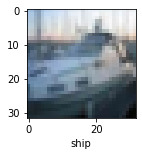

In [23]:
plot_sample(X_test, y_test,2)

In [24]:

classes[y_classes[2]]

'ship'